# Introduction to Artificial Neural Networks

鸟类激发了我们的灵感，牛蒡植物激发了魔术贴，大自然激发了许多其他发明的灵感。因此，对于如何构建智能机器的灵感来看大脑的架构似乎是合乎逻辑的。这是激发人工神经网络（ANNs）的关键思想。然而，虽然飞机受到鸟类的启发，但它们不必翻动翅膀。类比，人工神经网络已经逐渐与他们的生物表兄弟完全不同。一些研究人员甚至认为我们应该完全放弃有害类比（例如，通过说“单位”而不是“神经元”），以免我们将创造力限制在生物学上合理的系统。

人工神经网络是深度学习的核心。它们功能多样，功能强大，并且可扩展，使其成为处理大型和高度复杂的机器学习任务的理想选择，例如，对数十亿图像（例如Google图像）进行分类，为语音识别服务（例如，Apple的Siri）提供动力，每天向数亿用户（例如，YouTube）推荐观看最佳视频，或者学习打败世界Go游戏中的冠军通过检查数以百万计的过去的游戏，然后对抗自己（DeepMind的AlphaGo）。


在本章中，我们将介绍人工神经网络，从快速浏览最早的ANN架构开始。然后我们将介绍**多层感知器（MLP**）并使用TensorFlow实现一个解决MNIST数字分类
问题（在第3章中介绍）。

## Setup

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "10_Introduction to Artificial Neural Networks"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## 1. From Biological to Artificial Neurons

令人惊讶的是，人工神经网络已经存在了很长一段时间：
* **早在1943年**，它们由神经生理学家Warren McCulloch和数学家Walter Pitts 首次引入。McCulloch和Pitts在其具有里程碑意义的论文中，提出了一个简化的计算模型，即生物神经元如何在动物大脑中协同工作，使用命题逻辑进行复杂的计算。这是第一个人工神经网络架构。从那时起，我们将会发现许多其他架构的发明。

* 人工神经网络的早期成功直到**20世纪60年代**才引起人们普遍相信：我们很快就会与真正的智能机器交谈。当很明显这个承诺无法实现（至少在相当长一段时间内）时，资金就会飞到其他地方，人工神经网络进入一个漫长的黑暗时代。

* 在**20世纪80年代早期**，随着新网络架构的发明和更好的训练技术的发展，人们又对人工神经网络产生了兴趣。

* 但到了**20世纪90年代**，支持向量机（见第5章）等强大的替代机器学习技术受到大多数研究人员的青睐，因为它们似乎提供了更好的结果和更强的理论基础。

最后，我们正在目睹对人工神经网络的另一波浪潮。这波浪潮会像之前的那样消失吗？有一些很好的理由相信这一个是不同的，并将对我们的生活产生更深远的影响：

* 现在有大量的数据可用于训练神经网络，并且人工神经网络在非常大和复杂的问题上经常优于其他ML技术。

* 自20世纪90年代以来，计算能力的巨大增长使在合理的时间内训练大型神经网络成为现实。这部分归功于摩尔定律，同时也归功于游戏行业，它已经生产了数百万的强大GPU。

* 训练算法得到了改进。公平地说，他们只是与20世纪90年代使用的略微不同，但这些相对较小的调整有一个巨大的积极影响。

* 人工神经网络的一些理论局限性在实践中证明是良性的。例如，许多人认为ANN训练算法注定失败因为他们很可能陷入局部最优，但事实证明这在实践中相当罕见（或者在这种情况下，它们通常非常接近全局最优）。

* 人工神经网络似乎进入了资金和进步的良性循环。基于人工神经网络的惊人产品定期成为头条新闻，它们吸引了越来越多的关注和资金，导致越来越多的进步，甚至更多令人惊叹的产品。

### 1.1 Biological Neurons

在我们讨论人工神经元之前，让我们快速浏览一下生物神经元（如图10-1所示）。

* 它是一种看似不寻常的细胞，主要存在于动物大脑皮质（例如，你的大脑）中，由包含细胞核和大部分细胞复杂成分的细胞体组成，还有许多称为树突的分支延伸，加上一个称为轴突。

* 轴突的长度可能比细胞体长几倍，或者长达数万倍。

* 在它的极端附近，轴突分裂成许多称为端鞘的分支，并且在这些分支的尖端是称为突触末端（或简称突触）的微小结构，其连接到其他神经元的树突（或直接连接到细胞体）。

* 生物神经元通过这些突触接收称为来自其他神经元的信号的短电脉冲。

* 当神经元在几毫秒内从其他神经元接收到足够数量的信号时，它会发出自己的信号。

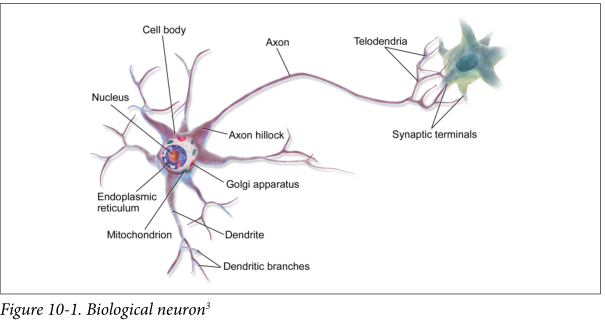

因此，个体生物神经元似乎表现得相当简单，但它们是由庞大的数十亿神经元网络组织的，每个神经元通常连接到数千个其他神经元。高度复杂的计算可以通过庞大的相当简单的神经元网络来执行，就像复杂的蚁群可以从简单的蚂蚁的共同努力中产生。生物神经网络（BNN）4的体系结构仍然是活跃研究的主题，但是大脑的某些部分已被映射，并且似乎神经元通常被组织在连续的层中，如图10-2所示。
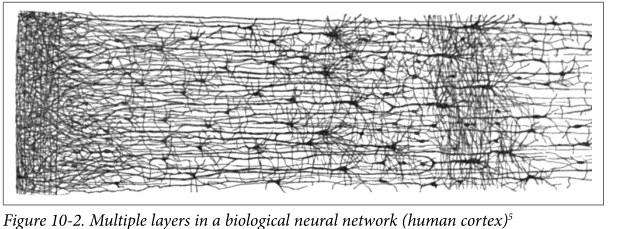

### 1.2 Logical Computations with Neurons

**神经元的逻辑计算**

Warren McCulloch和Walter Pitts提出了一个非常简单的神经元生物模型，后来被称为人工神经元：

* 它有一个或多个二进制（开/关）输入和一个二进制输出。 
* 当超过一定数量的输入有效时，人工神经元只会激活其输出。 

麦卡洛克和皮茨表明，即使有这样一个简化的模型，也有可能建立一个人工神经元网络来计算你想要的任何逻辑命题。 例如，让我们构建一些执行各种逻辑计算的人工神经网络（见图10-3），假设当至少有两个输入处于活动状态时激活神经元。

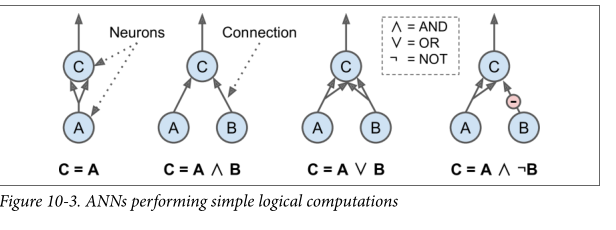

* 左边的第一个网络只是identity function：如果神经元A被激活，那么神经元C也被激活（因为它接收来自神经元A的两个输入信号），但是如果神经元A关闭，则神经元C也被关闭。

* 第二个网络执行逻辑**AND**：仅当神经元A和B都被激活时（单个输入信号不足以激活神经元C），神经元C才被激活。

* 第三网络执行逻辑**OR**：如果神经元A或神经元B被激活（或两者），神经元C被激活。

* 最后，如果我们假设输入连接可以抑制神经元的活动（这是生物神经元的情况），然后第四个网络计算稍微复杂的逻辑命题：
  
  * 神经元C仅在神经元A活跃且神经元B关闭时才被激活。
  * 如果神经元A始终处于活动状态，则会得到逻辑**NOT**：当神经元B关闭时神经元C处于活动状态，反之亦然。

你可以轻松地想象如何将这些网络组合起来以计算复杂的逻辑表达式（参见本章末尾的练习）。

### 1.3 The Perceptron

**感知机**

Perceptron是最简单的ANN架构之一，由Frank Rosenblatt于1957年发明。 它基于稍微不同的人工神经元（见图10-4），称为**线性阈值单位（LTU）**：输入和输出现在是数字（而不是二进制开/关值），每个输入连接与一个权重相关联。 LTU计算其输入的**加权和** ($ z = w_1 x_1 + w_2 x_2 +⋯+ w_n x_n = w^T·x $)，然后对该和应用**阶跃函数**并输出结果：$h_w(x)= step(z)=step(w^T·x)$。

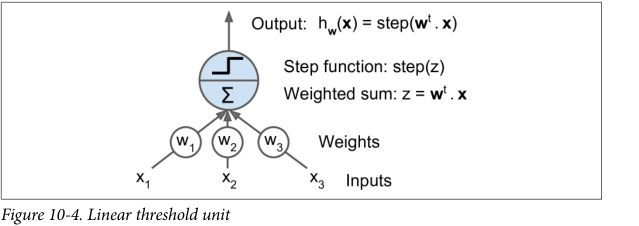

Perceptrons中使用的最常见的阶梯函数是Heaviside阶跃函数（见公式10-1）。 有时使用sign函数。
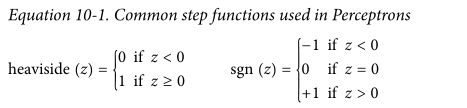

单个LTU可用于简单的**线性二分类**。它计算输入的线性组合，如果结果超过阈值，则输出正类或输出负类（就像Logistic回归分类器或线性SVM）。例如，你可以使用单个LTU根据花瓣长度和宽度对鸢尾花进行分类（还添加额外的偏置特征$ x_0 = 1$，就像我们在前面的章节中所做的那样）。训练LTU意味着为$ w_0，w_ 1和w_2$ 找到正确的值（训练算法将在稍后讨论）。

感知器简单地由单层LTU组成，每个神经元连接到所有输入。这些连接通常使用称为**输入神经元**的特殊直通神经元来表示：它们只输出它们被投喂的任何输入。此外，通常添加额外的偏置特征（$ x_0 = 1$）。这种偏差特征通常使用称为**偏置神经元**的特殊类型的神经元来表示，其仅一直输出1。

具有两个输入和三个输出的Perceptron如图10-5所示。这个Perceptron可以将实例同时分为三个不同的二元类，这使它成为一个多输出分类器。

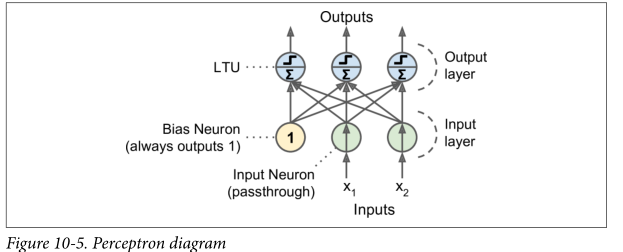

那么Perceptron是如何训练的呢？

Frank Rosenblatt提出的Perceptron训练算法很大程度上受到了Hebb规则的启发。Donald Hebb在1949年出版的“The Organization of Behavior”一书中提出，当一个生物神经元经常触发另一个神经元时，这两个神经元之间的联系就会变得更强。这个想法后来由SiegridLöwel在这个引人注目的短语中总结：“Cells that fire together, wire together”

这条规则后来被称为Hebb规则（或Hebbian学习）;也就是说，只要两个神经元具有相同的输出，它们之间的连接权重就会增加。使用该规则的变体训练感知器，其考虑了网络的错误;它不会加强导致错误输出的连接。

更具体地说，Perceptron一次被投喂一个训练实例，并且对于每个实例它进行预测。对于产生错误预测的每个输出神经元，它增强了输入的连接权重，这些权重将有助于正确的预测。该规则如公式10-2所示。
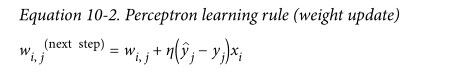

* $w_{i,j}$ 是第i个输入神经元和第j个输出神经元之间的连接权重。
* $x_i$ 是当前训练实例的第i个输入值。
* $\hat y_j$ 是当前训练实例的第j个输出神经元的输出。
* $y_j$ 是当前训练实例的第j个输出神经元的目标输出。
* $η$ 是学习率。

每个输出神经元的决策边界是线性的，所以Perceptrons无法学习复杂的模式（就像Logistic回归分类器一样）。但是，如果训练实例是线性可分的，Rosenblatt证明该算法会收敛到一个解。 这被称为**感知机**收敛定理。

Scikit-Learn提供了一个实现单个LTU网络的Perceptron类。 它可以像你期望的那样使用 - 例如，在鸢尾花数据集上（在第4章中介绍）：

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

Saving figure perceptron_iris_plot


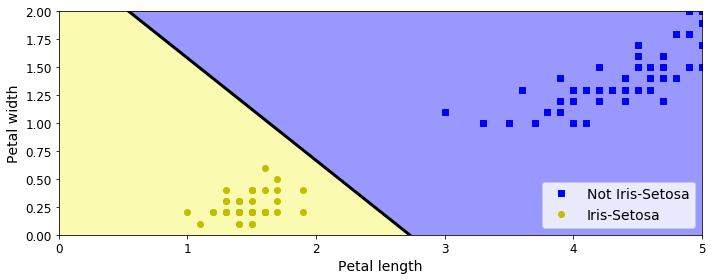

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

你可能已经认识到 Perceptron学习算法非常类似于随机梯度下降。事实上，Scikit-Learn的Perceptron类相当于使用具有以下超参数的SGDClassifier：
```
loss =“perceptron”，learning_rate =“constant”，eta0 = 1（学习率），penalty=None (no regularization)。
```

请注意，与Logistic回归分类器相反，Perceptrons不输出类概率;相反，他们只是根据硬阈值做出预测。这是更倾向于Logistic回归而不是感知机的一个好的理由。


1969年出版的专着名为 "Marvin Minsky and Seymour Papert"强调了感知机的一些严重弱点，特别是它们无法解决一些微不足道的问题（例如，异或（XOR）分类问题;参见图10-6的左侧）。当然，任何其他线性分类模型都是如此（例如Logistic回归分类器），但研究人员对Perceptrons的预期更多，他们的失望也很大：因此，许多研究人员完全放弃了*connectionism*（即研究）神经网络）支持更高级别的问题，如逻辑，解决问题和搜索。


然而，事实证明，通过堆叠多个Perceptrons可以消除Perceptrons的一些限制。得到的ANN称为多层感知器（MLP）。特别是，MLP可以解决XOR问题，因为你可以通过计算每个输入组合计算图10-6右侧所示MLP的输出来验证：输入（0,0）或（1,1） ）网络输出0，输入（0,1）或（1,0）输出1。

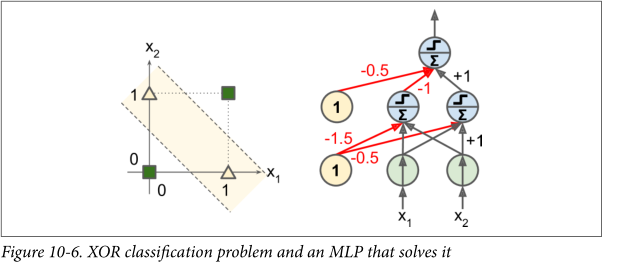

### 1.4 Multi-Layer Perceptron and Backpropagation

**多层感知机和反向传播**

MLP由一个（passthrough）**输入层**，一层或多层**LTU（称为隐藏层）** 和一层**LTU（称为输出层）**组成（见图10-7）。除输出层之外的每个层都包括偏置神经元并完全连接到下一层。 当ANN具有两个或更多隐藏层时，它被称为**深度神经网络**（DNN）。

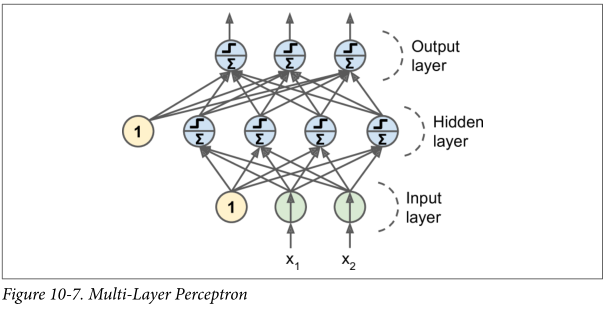

多年来，研究人员一直努力寻找训练MLP的方法，但没有成功。但在1986年，D. E. Rumelhart等人。发表了一篇开创性的文章，介绍了**反向传播训练算法**。
今天我们将它描述为使用反向模式自动调节的梯度下降（第4章介绍了梯度下降，第9章讨论了自动调节- autodiff ）。

对于每个训练实例，

* 算法将其提供给网络并计算每个连续层中每个神经元的输出（这是正向传递，就像在做预测时）。

* 然后它测量网络的输出误差（即，期望输出和网络的实际输出之间的差异），并且计算最后隐藏层中的每个神经元对每个输出神经元的误差贡献了多少。

* 然后，它继续测量这些误差贡献中有多少来自前一个隐藏层中的每个神经元 - 依此类推，直到算法到达输入层。

该反向通过通过在网络中向后传播误差梯度（因此算法的名称）来有效地测量网络中所有连接权重的误差梯度。如果你查看附录D中的反向模式自动编码算法，你会发现反向传播的正向和反向传递只是执行反向模式自动存储。

反向传播算法的最后一步是使用先前测量的误差梯度对网络中的所有连接权重进行梯度下降步骤。

让我们用更简洁的语言来描述：对于每个训练实例，反向传播算法
* 首先进行预测（正向传递），测量误差，
* 然后反过来每层反过来测量每个连接的误差贡献（反向传递），
* 最后稍微调整连接权重以减少错误（Gradient Descent步骤）。

为了使此算法正常工作，作者对MLP的架构进行了重大改变：

他们**用逻辑函数替换阶梯函数**，$σ(z)= 1 /(1 + exp(-z))$。这是必不可少的，因为阶梯函数只包含平面部分，因此没有梯度可以使用（梯度下降不能在平面上移动），而逻辑函数在任何地方都有明确定义的非零导数，允许梯度下降做出一些每一步都取得进步。
反向传播算法可以与其他**激活函数**一起使用，而不是逻辑函数。另外两种流行的激活函数是：

* The hyperbolic tangent function tanh $(z) = 2σ(2z) – 1$
    
    就像逻辑函数一样，它是S形的，连续的和可微的，但它的输出值的范围是-1到1（在逻辑函数的情况下，而不是0到1），这倾向于使每个层的输出在训练开     始时或多或少地标准化（即，以0为中心）。 这通常有助于加速收敛。
    
* The ReLU function (introduced in Chapter 9)

    $ReLU(z)= max(0，z)$。它是连续的但遗憾的是在z = 0时不可微分（斜率突然变化，这可能使梯度下降反弹）。然而，在实践中它运行良好并且具有快速     计算的优点。 最重要的是，它没有最大输出值这一事实也有助于减少梯度下降期间的一些问题（我们将在第11章回到这一点）。

下面的代码生成上面提到的三个激活函数，一个阶跃函数及它们导数如图10-8所示。

In [7]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


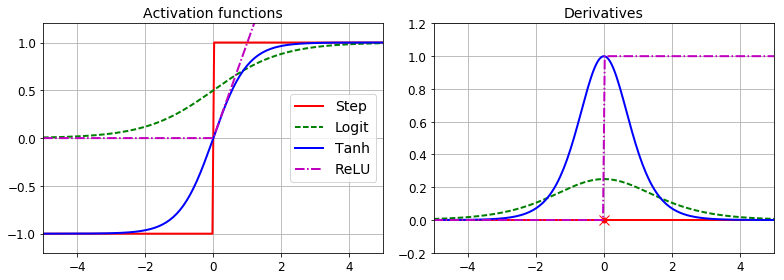

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

MLP通常用于分类，每个输出对应于不同的二元分类（例如，垃圾邮件/正常，紧急/非紧急等）。

当类是独立的时（例如，用于数字图像分类的0到9类），通常通过**用共享的softmax函数替换各个激活函数来修改输出层**（见图10-9）。
softmax函数在第3章中介绍。**每个神经元的输出对应于相应类的估计概率**。请注意，信号仅在一个方向上流动（从输入到输出），因此该架构是**前馈神经网络（FNN）的示例**。

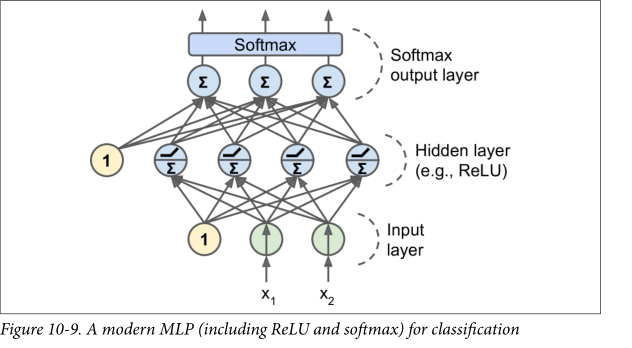

生物神经元似乎实现了大致的S形（S形）激活函数，因此研究人员长时间坚持使用sigmoid特征。但事实证明，ReLU激活功能通常在人工神经网络中效果更好。
这是生物类比具有误导性的案例之一。

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

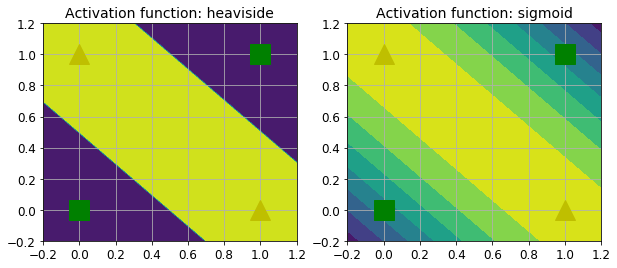

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## 2. Training an MLP with TensorFlow’s High-Level API

使用TensorFlow训练MLP的最简单方法是使用高级API TF.Learn，与Scikit-Learn的API非常相似。**DNNClassifier类**使得训练具有任意隐藏层数量的深度神经网络以及用于输出估计类概率的softmax输出层变得很简单。

例如，下面的代码训练一个DNN用于分类，有两个隐藏层（一个有300个神经元，另一个有100个神经元）和一个带有10个神经元的softmax输出层：

**使用Estimator API（以前称为tf.contrib.learn）**

In [10]:
import tensorflow as tf

**注意**：不推荐使用tf.examples.tutorials.mnist。我们将改用**tf.keras.datasets.mnist**。 此外，**tf.contrib.learn API**被提升为**tf.estimators和tf.feature_columns**，并且已经发生了很大变化。 特别是，没有infer_real_valued_columns_from_input（）函数或SKCompat类。

In [21]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [14]:
feature_cols = [tf.feature_column.numeric_column("X",shape=[28*28])]

dnn_clf = tf.estimator.DNNClassifier(
    hidden_units=[300,100],
    n_classes=10,
    feature_columns=feature_cols
)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X":X_train},
    y=y_train,num_epochs = 40,
    batch_size=50,
    shuffle = True
)

dnn_clf.train(input_fn = input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_task_id': 0, '_master': '', '_session_config': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\BAIDEQ~1\\AppData\\Local\\Temp\\tmp6idf_ia_', '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_log_step_count_steps': 100, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CEBC980828>, '_num_ps_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\BAIDEQ~1\AppData\Local\Temp\tmp6idf_ia_\model.ckpt.
INFO:tensorflow:loss = 112.96177, step = 1
INFO:tensorflow:global_step/sec: 303.842
INFO:tensorflow:loss = 15.912119, step = 101 (0.332 sec)
INFO:tensorflow:global_step/sec: 358.097
INFO:tensorflow:loss = 16.745094, step = 201 (

INFO:tensorflow:global_step/sec: 374.131
INFO:tensorflow:loss = 0.44915354, step = 7501 (0.270 sec)
INFO:tensorflow:global_step/sec: 351.801
INFO:tensorflow:loss = 0.83914435, step = 7601 (0.281 sec)
INFO:tensorflow:global_step/sec: 334.238
INFO:tensorflow:loss = 0.10093067, step = 7701 (0.300 sec)
INFO:tensorflow:global_step/sec: 416.043
INFO:tensorflow:loss = 0.73892045, step = 7801 (0.239 sec)
INFO:tensorflow:global_step/sec: 434.063
INFO:tensorflow:loss = 0.12051909, step = 7901 (0.232 sec)
INFO:tensorflow:global_step/sec: 412.62
INFO:tensorflow:loss = 0.18087877, step = 8001 (0.240 sec)
INFO:tensorflow:global_step/sec: 424.866
INFO:tensorflow:loss = 1.4045475, step = 8101 (0.235 sec)
INFO:tensorflow:global_step/sec: 423.063
INFO:tensorflow:loss = 0.3188472, step = 8201 (0.236 sec)
INFO:tensorflow:global_step/sec: 376.949
INFO:tensorflow:loss = 0.033682402, step = 8301 (0.267 sec)
INFO:tensorflow:global_step/sec: 428.492
INFO:tensorflow:loss = 0.5648092, step = 8401 (0.232 sec)
INF

INFO:tensorflow:global_step/sec: 370.004
INFO:tensorflow:loss = 0.021107823, step = 15701 (0.270 sec)
INFO:tensorflow:global_step/sec: 371.359
INFO:tensorflow:loss = 0.136553, step = 15801 (0.269 sec)
INFO:tensorflow:global_step/sec: 365.944
INFO:tensorflow:loss = 0.048652083, step = 15901 (0.273 sec)
INFO:tensorflow:global_step/sec: 346.706
INFO:tensorflow:loss = 0.083573565, step = 16001 (0.288 sec)
INFO:tensorflow:global_step/sec: 382.697
INFO:tensorflow:loss = 0.06808236, step = 16101 (0.262 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.023237469, step = 16201 (0.277 sec)
INFO:tensorflow:global_step/sec: 347.804
INFO:tensorflow:loss = 0.014023008, step = 16301 (0.287 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.23248738, step = 16401 (0.263 sec)
INFO:tensorflow:global_step/sec: 359.366
INFO:tensorflow:loss = 0.14078617, step = 16501 (0.278 sec)
INFO:tensorflow:global_step/sec: 379.815
INFO:tensorflow:loss = 0.076245934, step = 16601 

INFO:tensorflow:global_step/sec: 332.92
INFO:tensorflow:loss = 0.025542974, step = 23801 (0.300 sec)
INFO:tensorflow:global_step/sec: 341.044
INFO:tensorflow:loss = 0.013460496, step = 23901 (0.293 sec)
INFO:tensorflow:global_step/sec: 334.226
INFO:tensorflow:loss = 0.0045135557, step = 24001 (0.299 sec)
INFO:tensorflow:global_step/sec: 343.372
INFO:tensorflow:loss = 0.036642414, step = 24101 (0.292 sec)
INFO:tensorflow:global_step/sec: 337.675
INFO:tensorflow:loss = 0.045598157, step = 24201 (0.298 sec)
INFO:tensorflow:global_step/sec: 359.415
INFO:tensorflow:loss = 0.020785522, step = 24301 (0.275 sec)
INFO:tensorflow:global_step/sec: 328.746
INFO:tensorflow:loss = 0.057012834, step = 24401 (0.305 sec)
INFO:tensorflow:global_step/sec: 341.045
INFO:tensorflow:loss = 0.041556224, step = 24501 (0.293 sec)
INFO:tensorflow:global_step/sec: 345.701
INFO:tensorflow:loss = 0.027522964, step = 24601 (0.290 sec)
INFO:tensorflow:global_step/sec: 343.429
INFO:tensorflow:loss = 0.050619055, step 

INFO:tensorflow:global_step/sec: 368.339
INFO:tensorflow:loss = 0.008822109, step = 31901 (0.273 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.017841239, step = 32001 (0.269 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.008823352, step = 32101 (0.276 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.034980558, step = 32201 (0.292 sec)
INFO:tensorflow:global_step/sec: 360.673
INFO:tensorflow:loss = 0.012858465, step = 32301 (0.278 sec)
INFO:tensorflow:global_step/sec: 361.977
INFO:tensorflow:loss = 0.031771764, step = 32401 (0.274 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.021444773, step = 32501 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.94
INFO:tensorflow:loss = 0.04761786, step = 32601 (0.272 sec)
INFO:tensorflow:global_step/sec: 368.609
INFO:tensorflow:loss = 0.061305627, step = 32701 (0.272 sec)
INFO:tensorflow:global_step/sec: 342.227
INFO:tensorflow:loss = 0.014294568, step = 

INFO:tensorflow:global_step/sec: 416.05
INFO:tensorflow:loss = 0.012282183, step = 40001 (0.241 sec)
INFO:tensorflow:global_step/sec: 390.135
INFO:tensorflow:loss = 0.041295074, step = 40101 (0.254 sec)
INFO:tensorflow:global_step/sec: 396.326
INFO:tensorflow:loss = 0.005083915, step = 40201 (0.255 sec)
INFO:tensorflow:global_step/sec: 388.631
INFO:tensorflow:loss = 0.035944417, step = 40301 (0.254 sec)
INFO:tensorflow:global_step/sec: 407.595
INFO:tensorflow:loss = 0.012394086, step = 40401 (0.246 sec)
INFO:tensorflow:global_step/sec: 364.606
INFO:tensorflow:loss = 0.0040666834, step = 40501 (0.273 sec)
INFO:tensorflow:global_step/sec: 402.679
INFO:tensorflow:loss = 0.0064016413, step = 40601 (0.248 sec)
INFO:tensorflow:global_step/sec: 390.149
INFO:tensorflow:loss = 0.0045571807, step = 40701 (0.257 sec)
INFO:tensorflow:global_step/sec: 391.658
INFO:tensorflow:loss = 0.017198497, step = 40801 (0.254 sec)
INFO:tensorflow:global_step/sec: 379.808
INFO:tensorflow:loss = 0.03401333, step

In [15]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2018-10-29-12:04:03
INFO:tensorflow:Restoring parameters from C:\Users\BAIDEQ~1\AppData\Local\Temp\tmp6idf_ia_\model.ckpt-44000
INFO:tensorflow:Finished evaluation at 2018-10-29-12:04:03
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9804, average_loss = 0.09432094, global_step = 44000, loss = 11.939359


In [16]:
eval_results

{'accuracy': 0.9804,
 'average_loss': 0.09432094,
 'global_step': 44000,
 'loss': 11.939359}

In [19]:
y_pred_iter = dnn_clf.predict(input_fn = test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Restoring parameters from C:\Users\BAIDEQ~1\AppData\Local\Temp\tmp6idf_ia_\model.ckpt-44000


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -7.5783896 ,  -3.5206206 ,  -1.1433134 ,   2.9694269 ,
         -3.0890555 ,  -2.203714  , -27.402853  ,  22.124546  ,
         -3.294263  ,   0.61613345], dtype=float32),
 'probabilities': array([1.2594437e-13, 7.2852713e-12, 7.8504869e-11, 4.7977493e-09,
        1.1216872e-11, 2.7187592e-11, 3.0940314e-22, 1.0000000e+00,
        9.1359125e-12, 4.5605245e-10], dtype=float32)}

DNNClassifier类基于ReLU激活函数创建所有神经元层（我们可以通过设置activation_fn超参数来改变它）。输出层依赖于softmax函数，成本函数是交叉熵（在第4章中介绍）。

TF.Learn API仍然很新，因此在你阅读本书时，这些示例中使用的某些名称和函数可能会有所变化。 但是，一般的想法不应该改变。

## 3. Training a DNN Using Plain TensorFlow

**使用Plain TensorFlow训练DNN**

如果你想要更好地控制网络架构，你可能更愿意使用TensorFlow的低级Python API（在第9章中介绍）。在本节中，我们将使用此API构建相同的模型，并且我们将实现Mini-batch Gradient Descent以在MNIST数据集上训练它。

**第一步是构建阶段，构建TensorFlow图**。 

**第二步是执行阶段，你实际运行图表来训练模型**。



### 3.1  Construction Phase

**构建阶段**

* 首先，我们需要导入tensorflow库。 
* 然后我们必须指定输入和输出的数量，并设置每层中隐藏神经元的数量：

In [9]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

接下来，就像你在第9章中所做的那样，你可以使用占位符节点来表示训练数据和目标。 X的形状仅部分定义。我们知道
* X 是一个2D张量（即矩阵），第一维度是实例和第二维是特征，我们知道特征的数量将是 28 x 28（每个像素一个特征） ，但我们还不知道每个训练批次将包含多少个实例。所以X的形状是（None，n_inputs）。
* y 是一个1 D张量，每个实例有一个条目，但此时我们不知道训练批次的大小，因此形状为（None）

In [10]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

现在让我们创建实际的神经网络。

* 占位符X将充当输入层; 在执行阶段，它将一次替换为一个训练批次（请注意，训练批次中的所有实例将由神经网络同时处理）。

* 现在你需要创建两个隐藏图层和输出图层。

    * 两个隐藏层几乎相同：它们的区别仅在于它们所连接的输入以及它们包含的神经元数量。 
    
    * 输出层也非常相似，但它使用softmax激活函数而不是ReLU激活函数。

所以让我们创建一个**neuron_layer（）函数**，我们将用它一次创建一个图层。 它需要参数来指定**输入，神经元数量，激活函数和图层名称**：

In [11]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

让我们逐行走读这段代码：

1. 首先，我们使用图层名称创建**名称范围**：它将包含该神经元层的所有计算节点。这是可选的，但如果TensorBoard的节点组织良好，那么图形看起来会更好。

2. 接下来，我们通过**查找输入矩阵的形状**并获得第二个维度的大小来获得输入的数量（第一个维度用于实例）。

3. 接下来的三行**创建一个W变量，用于保存权重矩阵**。它将是一个2D张量，包含每个输入和每个神经元之间的所有连接权重;因此，它的形状将是（n_inputs，n_neurons）。它将使用截断的正态（高斯）分布随机初始化，标准偏差为$\sqrt[2]{n_{inputs}}$输入。使用这种特定的标准偏差有助于算法收敛得更快（我们将在第11章进一步讨论;这是对神经网络的效率产生巨大影响的小调整之一）。为所有隐藏层随机初始化连接权重非常重要，以避免Gradient Descent算法无法破解的任何对称性。

4. 下一行为偏差**创建一个b变量，初始化为0**（没有对称问题）这种情况），每个神经元有一个偏差参数。然后我们创建一个子图来计算$z = X·W + b$。这种矢量化实现将有效地计算输入的加权和加上图层中每个神经元的偏差项，对于批次中的所有实例，只需一次注射。

6. 最后，如果激活参数设置为“relu”，则代码返回$relu（z）$（即 max（0，z）），否则它只返回 z

好的，现在你有一个很好的函数来创建一个神经元层。 让我们用它来创造深层神经网络！ 
* 第一个隐藏层以X为输入。

* 第二个将第一个隐藏层的输出作为其输入。 

* 最后，输出层将第二个隐藏层的输出作为输入。

In [12]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

请注意，为清楚起见，我们再次使用**名称范围**。另请注意，logits是在通过softmax激活函数之前的神经网络的输出：出于优化原因，我们稍后将处理softmax计算。

正如你所料，TensorFlow带有许多方便的函数来创建标准的神经网络层，所以通常不需要像我们刚才那样定义你自己的**neuron_layer（）函数**。例如，TensorFlow的**fully_connected（）函数创建一个完全连接的层，其中所有输入都连接到层中的所有神经元**。

* 它负责创建权重和偏差变量，使用正确的初始化策略，它**默认使用ReLU激活函数**（我们可以使用**activation_fn参数**更改它）。

* 正如我们将在第11章中看到的，它还支持正则化和规范化参数。

让我们调整前面的代码来使用**fully_connected（）函数**而不是**我们的neuron_layer（）函数**。只需导入该函数并使用以下代码替换dnn构造部分：

In [13]:
from tensorflow.contrib.layers import fully_connected 

with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, scope="outputs",activation_fn=None)

**tensorflow.contrib**包中包含许多有用的函数，但它是一个实验代码的地方，尚未准备好成为TensorFlow API的主要部分。因此，**fully_connected（）函数**（以及任何其他贡献代码）将来可能会更改或移动。

现在我们已经准备好了神经网络模型，我们需要定义我们将用于训练它的成本函数。正如我们在第4章中对Softmax回归所做的那样，我们将使用**交叉熵，交叉熵将惩罚估计目标类别的低概率的模型**。

TensorFlow提供了几种计算交叉熵的函数我们将使用**sparse_soft max_cross_entropy_with_logits（）**：

* 它根据“logits”（即在通过softmax激活函数之前的网络输出）计算交叉熵，
* 并且它期望整数形式的标签从0到类的数量减1（在我们的案例，从0到9）。

* 这将给出一个包含每个实例的交叉熵的1D张量。
* 然后我们可以使用TensorFlow的reduce_mean（）函数来计算所有实例的平均交叉熵。

In [26]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

**sparse_softmax_cross_entropy_with_logits（）函数**等效于**应用softmax激活函数然后计算交叉熵**，但它更有效，并且它能正确处理像log等于0的极端情况。这就是我们之前没有应用softmax激活函数的原因。

还有另一个名为**softmax_cross_entropy_with_logits（）的函数**，它以单热矢量的形式获取标签（而不是从0到类的数量减去1的整数）。

现在我们有神经网络模型，成本函数，现在我们需要定义一个**GradientDescentOptimizer**，**它将调整模型参数以最小化成本函数**。 没什么新鲜的; 就像我们在第9章中所做的那样：

In [27]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

**构建阶段的最后一个重要步骤是指定如何评估模型**。我们将简单地使用**准确性**作为我们的绩效指标

* 首先，对于每个实例，通过检查最高logit是否对应于目标类来确定神经网络的预测是否正确。为此，你可以使用**in_top_k（）函数**。 这会返回一个充满布尔值的1D张量，因此我们需要将这些布尔值转换为浮点值，然后计算平均值。 这将为我们提供网络的整体准确性。

In [28]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

* 然后和往常一样，我们需要创建一个节点来初始化所有变量，我们还将创建一个Saver来将我们训练的模型参数保存到磁盘：

In [29]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

这是构建阶段的结论。 这还不到40行代码，但它非常激烈：

1. 我们为输入和目标创建了占位符，
2. 我们创建了一个构建神经元层的函数，我们用它来创建DNN，
3. 我们定义了成本函数，
4. 我们创建了一个优化器，
5. 最后我们定义了性能测量。

现在进入执行阶段。

### 3.2 Execution Phase

这部分更短更简单。

**首先，让我们加载MNIST**。 我们可以像前面章节中那样使用Scikit-Learn，但是TensorFlow提供了自己的帮助程序，**可以获取数据**，对其**进行缩放**（在0和1之间），对其**进行打乱**，并提供一个简单的函数，**一次加载一个mini-batches**。所以让我们改用它：

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

In [19]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

现在我们定义我们想要运行的 number of epochs，以及mini-batches的大小：

In [23]:
n_epochs = 40
batch_size = 50

开始训练模型

In [32]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9512
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.9628
8 Batch accuracy: 0.98 Val accuracy: 0.965
9 Batch accuracy: 0.96 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9708
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.973
16 Batch accuracy: 1.0 Val accuracy: 0.9732
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9744
19 Batch accuracy: 0.98 Val accuracy: 0.975
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.976
22 Batch accuracy: 0.98 Val accurac

此代码：
* 首先打开TensorFlow会话，运行初始化所有变量的init节点。
* 然后它运行主训练循环：在每个时代，代码迭代通过对应于训练集大小的许多小批量。
* 通过next_batch（）方法获取每个小批量，然后代码只运行训练操作，为其提供当前的小批量输入数据和目标。
* 接下来，在每个epoch的末尾，代码评估最后一个小批量和完整训练集上的模型，并打印出结果。 最后，模型参数保存到磁盘。

### 3.3 Using the Neural Network

现在神经网络已经过训练，你可以使用它来进行预测。为此，你可以**重用相同的构造阶段**，但是**更改执行阶段**，如下所示：

In [33]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


* 首先，代码从磁盘加载模型参数。
* 然后它会加载一些你想要分类的新图像。 请记住应用与训练数据相同的特征缩放（在这种情况下，将其从0缩放到1）。
* 然后代码评估logits节点。如果你想知道所有估计的类概率，你需要将softmax（）函数应用于logits，但是如果你只想预测一个类，你可以简单地选择具有最高logit值的类（使用 argmax（）函数可以解决问题）。

In [34]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [27]:
from tensorflow_graph_in_jupyter import show_graph

In [28]:
show_graph(tf.get_default_graph())

## 4. Fine-Tuning Neural Network Hyperparameters

神经网络的灵活性也是它们的主要缺点之一：有很多超参数需要调整。你不仅可以使用任何可以想象的**网络拓扑**（神经元如何互连），但即使在简单的MLP中，你也可以更改层数，每层神经元数量，每层使用的激活函数类型，重量初始化逻辑等等。
你如何知道哪种超参数的组合最适合你的任务？


当然，你可以使用**带有交叉验证的网格搜索**来查找正确的超参数，就像你在前面的章节中所做的那样，但由于有许多超参数可供调整，并且由于在大型数据集上训练神经网络需要花费大量时间，因此你**只能使用能够在合理的时间内探索超参数空间的一小部分**。如我们在第2章中讨论的那样，**使用随机搜索要好得多**。

另一种选择是使用诸如Oscar之类的工具，它实现了更复杂的算法，可以帮助你快速找到一组好的超参数。有助于了解每个超参数的值是否合理，因此你可以限制搜索空间。让我们从隐藏层的数量开始。

### 4.1 Number of Hidden Layers

对于很多问题，你可以从一个隐藏层开始，你就可以得到合理的结果。实际上已经表明，只有一个隐藏层的MLP即使是最复杂的函数也可以建模，只要它有足够的神经元。很长一段时间，这些事实使研究人员确信没有必要调查任何更深层次的神经网络。但他们忽略了这样一个事实，即**深度网络的参数效率要比浅层网络高得多**：它们可以**使用比浅网更少的神经元来模拟复杂函数，从而使它们更快地进行训练**。

要了解原因，假设你被要求使用某些绘图软件绘制森林，但禁止使用复制/粘贴。你必须单独绘制每个树，每个分支，每片树叶。如果你可以改为绘制一个叶子，复制/粘贴它以绘制一个分支，然后复制/粘贴该分支以创建一个树，最后复制/粘贴这个树来制作一个森林，你很快就会完成。

**真实世界数据通常以这种分层方式构建**，DNN自动利用这一事实：
* 低层隐藏层模拟低层结构（例如，各种形状和方向的线段），
* 中间隐藏层将这些低层结构组合成模型中间层结构（例如，正方形，圆形），
* 最高隐藏层和输出层将这些中间结构组合以模拟高级结构（例如，面）。

这种分层体系结构不仅可以帮助DNN更快地收敛到一个好的解决方案，它还提高了他们推广到新数据集的能力。例如，如果你已经训练过模型来识别图片中的**面部**，并且你现在想要训练新的神经网络来识别**发型**，那么
* 你可以通过重复使用第一个网络的较低层来启动训练。
* 你可以将它们初始化为第一个网络的较低层的权重和偏差值，而不是随机初始化新神经网络的前几层的权重和偏差。

这样，网络就不必从头学习大多数图片中出现的所有低级结构;它只需要学习更高级别的结构（例如发型）。

**综上所述**，

* 对于许多问题，你可以**从一个或两个隐藏层开始**，它会工作得很好（例如，使用一个隐藏层和几百个神经元，你可以很容易地在MNIST数据集上达到97％以上的准确度，使用具有相同神经元总数的两个隐藏层，在大致相同的训练量下，准确度达到98％以上时间）。

* 对于更复杂的问题，你可以**逐渐增加隐藏层的数量**，直到你开始过度拟合训练集。

* 非常复杂的任务，例如大图像分类或语音识别，通常需要具有数十层（甚至数百层，但不是完全连接的网络）的网络，如我们将在第13章中看到的那样，并且它们需要大量的训练数据。但是，你很少需要从头开始训练此类网络：重复使用执行类似任务的**预先训练的 state-of-the-art 网络**的部分更为常见。训练将更快，并且需要更少的数据（我们将在第11章讨论这个问题）。

### 4.2 Number of Neurons per Hidden Layer

显然，**输入和输出层中的神经元数量由你的任务所需的输入和输出类型决定**。例如，
* MNIST任务需要28 x 28 = 784个输入神经元和10个输出神经元。
* 至于隐藏层，通常的做法是将它们调整为一个漏斗，每层的神经元越来越少 - 理由是许多低级特征可以合并为更少的高级特征。例如，MNIST的典型神经网络可能有两个隐藏层，第一个包含300个神经元，第二个包含100个神经元。

然而，这种做法现在并不常见，你可以简单地对所有隐藏层使用相同的大小 ——例如，所有隐藏层都有150个神经元：这只是一个超参数调整而不是每层一个。就像层数一样，你可以尝试逐渐增加神经元的数量，直到网络**开始过度拟合**。一般来说，**通过增加层数而不是每层神经元数量，你将获得更多的收益**。不幸的是，正如你所看到的，找到完美数量的神经元仍然是一种黑色艺术。

一种更简单的方法是**选择一个具有比实际需要更多的层和神经元的模型，然后使用早期停止来防止它过度拟合**（以及其他正则化技术，特别是dropout，我们将在第11章中看到）。这被称为“弹力裤”方法：只需使用大号弹力裤，缩小到合适的尺寸。而不是浪费时间寻找完全符合你尺寸的裤子，


### 4.3  Activation Functions

在多数情况下你可以
* 在**隐藏层**中使用ReLU激活函数（或其中一个变体，我们将在第11章中看到）它的计算速度比其他激活函数快一点，并且Gradient Descent不会在高原上陷入困境，这要归功于它对于大输入值不会饱和（与逻辑函数或双曲正切函数相反，它在1处饱和）。

* 对于**分类任务**，在**输出层**使用softmax激活函数通常是一个不错的选择（当类是互斥的时候）。

* 对于**回归任务**，你根本不能使用任何激活函数能。 

以上介绍了人工神经网络。 在接下来的章节中，我们将讨论训练非常深的网络的技术，并在多个服务器和GPU之间分配训练。 然后我们将探索一些其他流行的神经网络架构：卷积神经网络，递归神经网络和自动编码器。

**Using dense() instead of neuron_layer()**

注意：本书的前几个版本使用了tensorflow.contrib.layers.fully_connected（）而不是tf.layers.dense（）（在编写本章时不存在）。现在最好使用**tf.layers.dense（）**，因为contrib模块中的任何内容都可能更改或删除，恕不另行通知。

dense（）函数几乎与fully_connected（）函数相同，除了一些细微差别：几个参数被重命名：

* scope成为name，
* activation_fn变为activation（类似地，_fn后缀从其他参数中删除，例如normalizer_fn），
* weights_initializer成为kernel_initializer等。
* 默认激活现在为None而不是tf.nn.relu。

第11章介绍了一些差异。

In [1]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [15]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [16]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [17]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9514
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9682
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9698
15 Batch accuracy: 0.94 Validation accuracy: 0.9722
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.973
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.96 Valid

In [29]:
show_graph(tf.get_default_graph())

## Exercise solutions

**1. to 8.**
请移步[我的简书](https://www.jianshu.com/p/ee1d6c1c7a1b).

**9.**

在MNIST数据集上训练深度MLP，看看是否可以获得超过98％的精度。 就像在第9章的最后一次练习中一样，尝试添加所有的bells and whistles（即，保存检查点，在中断的情况下恢复最后一个检查点，添加摘要，使用TensorBoard绘制学习曲线，等等）。

首先让我们创建深度网络。 它与之前完全相同，**只有一个补充：我们添加了一个tf.summary.scalar（）来跟踪训练期间的损失和准确性**，因此我们可以使用TensorBoard查看好的学习曲线。

In [30]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [31]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [32]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [33]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [34]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [36]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

现在我们需要定义将TensorBoard日志写入的目录：

In [37]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [38]:
logdir = log_dir("mnist_dnn")

现在我们可以创建将用于编写TensorBoard日志的FileWriter：

In [39]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

为什么我们不早点停止？ 为此，我们将需要使用验证集。

In [40]:
m, n = X_train.shape

In [41]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.240% 	Loss: 0.35380
Epoch: 5 	Validation accuracy: 95.120% 	Loss: 0.17922
Epoch: 10 	Validation accuracy: 96.560% 	Loss: 0.12781
Epoch: 15 	Validation accuracy: 97.180% 	Loss: 0.10324
Epoch: 20 	Validation accuracy: 97.480% 	Loss: 0.09160
Epoch: 25 	Validation accuracy: 97.600% 	Loss: 0.08211
Epoch: 30 	Validation accuracy: 97.720% 	Loss: 0.07886
Epoch: 35 	Validation accuracy: 97.780% 	Loss: 0.07423
Epoch: 40 	Validation accuracy: 97.840% 	Loss: 0.07158
Epoch: 45 	Validation accuracy: 98.080% 	Loss: 0.06742
Epoch: 50 	Validation accuracy: 98.040% 	Loss: 0.06731
Epoch: 55 	Validation accuracy: 98.020% 	Loss: 0.06675
Epoch: 60 	Validation accuracy: 98.080% 	Loss: 0.06726
Epoch: 65 	Validation accuracy: 98.200% 	Loss: 0.06662
Epoch: 70 	Validation accuracy: 98.180% 	Loss: 0.06599
Epoch: 75 	Validation accuracy: 98.100% 	Loss: 0.06633
Epoch: 80 	Validation accuracy: 98.140% 	Loss: 0.06651
Epoch: 85 	Validation accuracy: 98.220% 	Loss: 0.06591
Epoch: 90 	V

In [42]:
os.remove(checkpoint_epoch_path)

In [43]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [44]:
accuracy_val

0.9794